In [0]:
# !pip install --upgrade tables

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pwd

/content


In [5]:
cd "/content/drive/My Drive/Colab Notebooks/car_prices/Car_price_prediction/"

/content/drive/My Drive/Colab Notebooks/car_prices/Car_price_prediction


In [6]:
!ls

2_visualisation.ipynb  data  LICENSE  README.md


In [8]:
# Loading data

df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [9]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

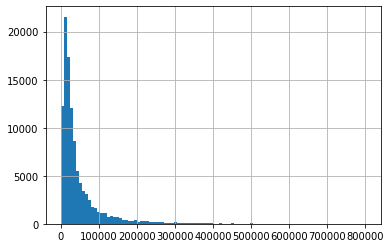

In [10]:
df.price_value.hist(bins=100)

In [11]:
# Most expensive car

df.price_value.max()

799900.0

In [14]:
df.price_value.describe()
# 25% of cars cost 13890 or less
# 50% or cars cost 25500 or less
# ...

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [0]:
# Finding nd parameter to group by it

In [16]:
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

In [17]:
df.groupby('param_marka-pojazdu')['price_value'].mean()

param_marka-pojazdu
Acura         32349.250000
Aixam         26129.208955
Alfa Romeo    52053.311086
Aro           20800.000000
Asia          12500.000000
                  ...     
Yugo          47500.000000
Zaporożec      3900.000000
Zastava        2999.000000
Škoda         40068.437434
Żuk            4722.500000
Name: price_value, Length: 100, dtype: float64

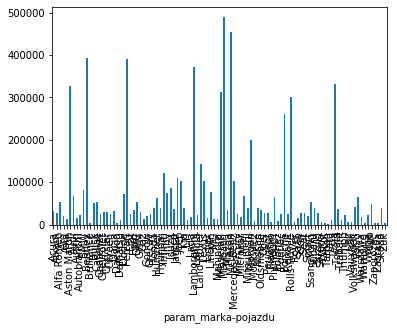

In [18]:
df.groupby('param_marka-pojazdu')['price_value'].agg(np.mean).plot(kind='bar')

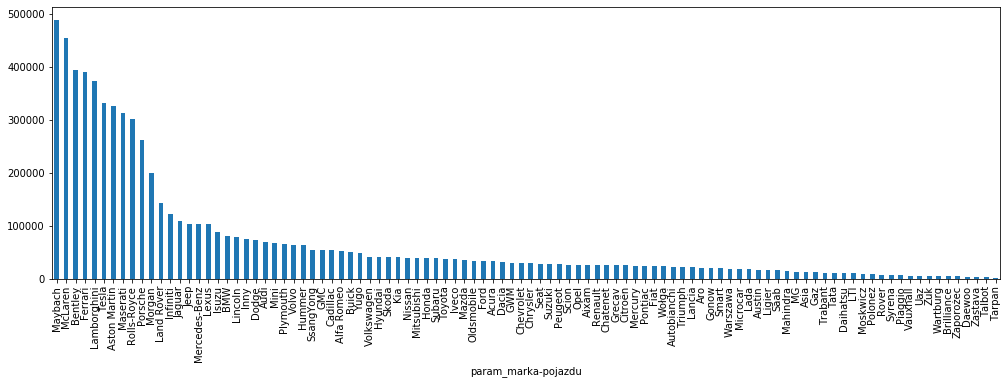

In [24]:
# Mean price per brand

(
    
  df
 .groupby('param_marka-pojazdu')['price_value']
 .agg(np.mean)
 .sort_values(ascending=False)

).plot(kind='bar', figsize=(17,5))

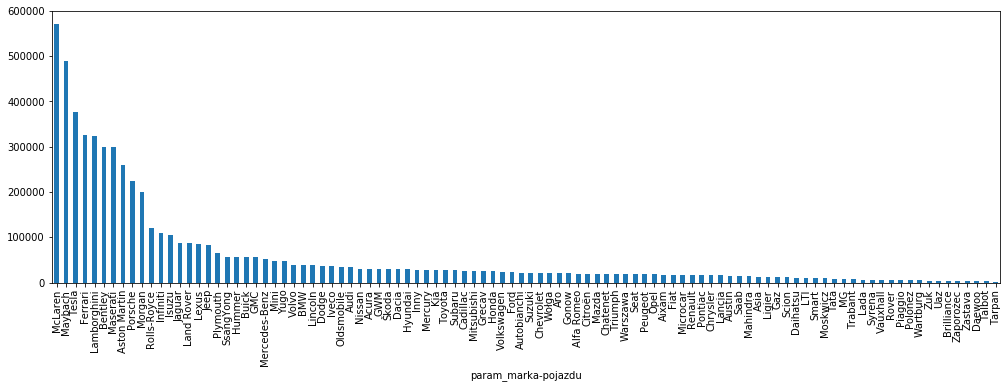

In [25]:
# Median price per brand

(
    
  df
 .groupby('param_marka-pojazdu')['price_value']
 .agg(np.median)
 .sort_values(ascending=False)

).plot(kind='bar', figsize=(17,5))

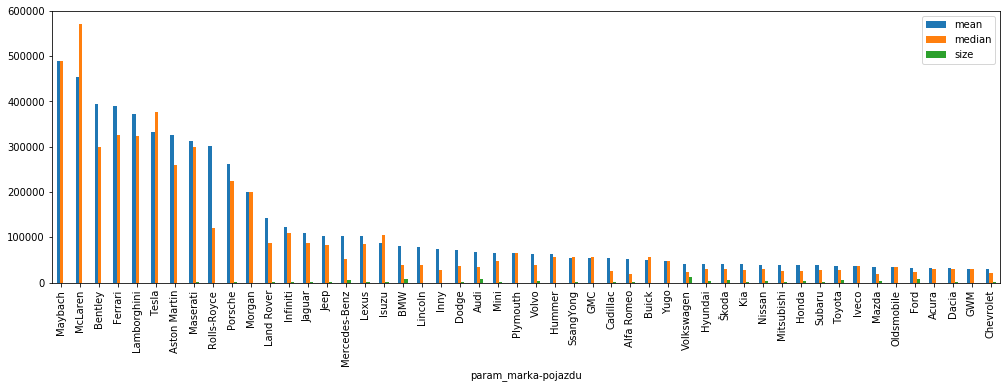

In [29]:
# Mean, median and size by car brand

# Median price per brand

(
    
  df
 .groupby('param_marka-pojazdu')['price_value']
 .agg([np.mean,np.median,np.size]) # size = how many observations from given car brand there are
 .sort_values(by='mean',ascending=False)
 .head(50) # with sort(ascending=False) and head we get 50 most represented brands (fro the top)

).plot(kind='bar', figsize=(17,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb770c7c50>,
      dtype=object)

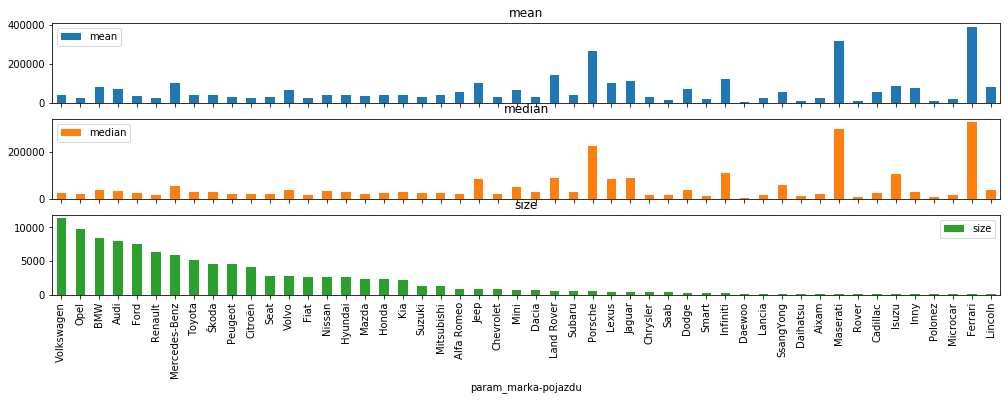

In [31]:
# Mean, median and size by car brand

# 1 - mean
# 2 - median
# 3 - size (number of observations from certain car brand)

# sorted by size

(
    
  df
 .groupby('param_marka-pojazdu')['price_value']
 .agg([np.mean,np.median,np.size]) # size = how many observations from given car brand there are
 .sort_values(by='size',ascending=False) # sort by=size
 .head(50) # with sort(ascending=False) and head we get 50 most represented brands (fro the top)

).plot(kind='bar', figsize=(17,5), subplots=True)

In [0]:
# Defining function for visualizing data based on previous code
def group_and_barplot(feat_groupby,feat_agg='price_value',agg_func=[np.mean,np.median,np.size], feat_sort='mean',top=50,subplots=True):
  (
      
    df
  .groupby(feat_groupby)[feat_agg] # sort column feat_groupby by solumns feat_agg
  .agg(agg_func) # different aggregation functions to perform on grouped feat_groupby
  .sort_values(by=feat_sort,ascending=False) # sorting
  .head(top) # with sort(ascending=False) and head(top=n) we get n most represented brands.

  ).plot(kind='bar', figsize=(17,5), subplots=subplots) #subplots - True(splitting plots for each agg_func)



In [0]:
group_and_barplot('param_marka-pojazdu')

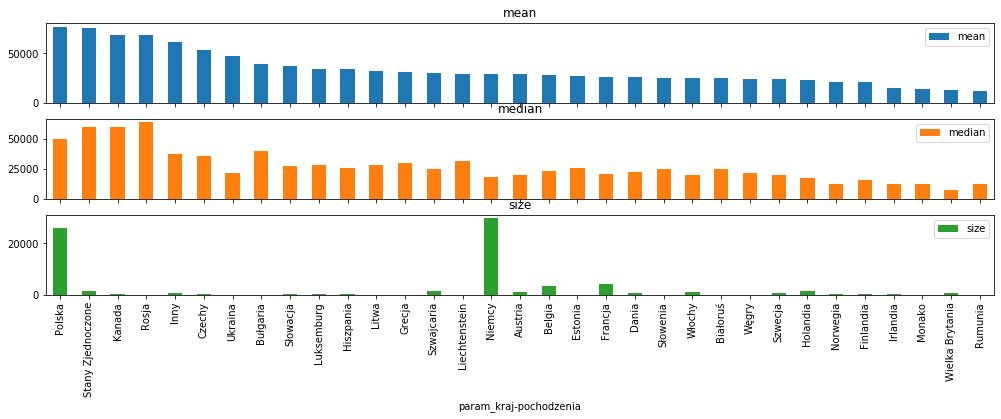

In [39]:
# Checking param_kraj-pochodzenia - origin country
# sorting by mean price/ Polska - most expensvie, Rumunia - least.

group_and_barplot('param_kraj-pochodzenia')

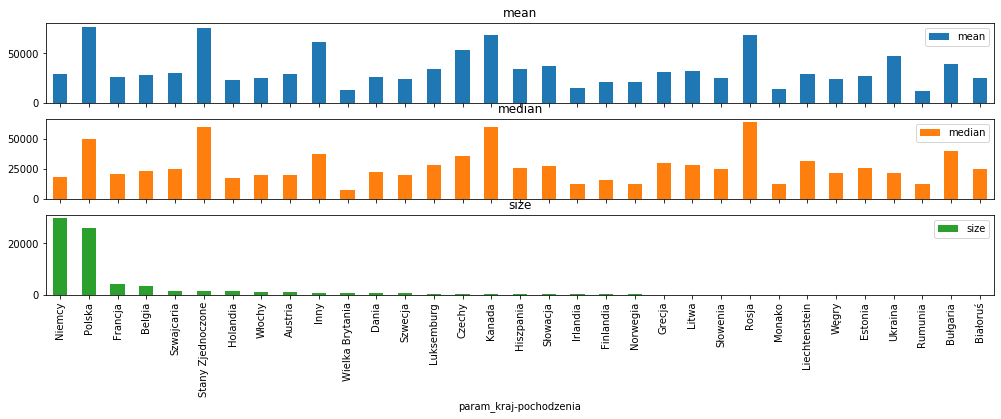

In [41]:
# Sort by size.
group_and_barplot('param_kraj-pochodzenia',feat_sort='size')

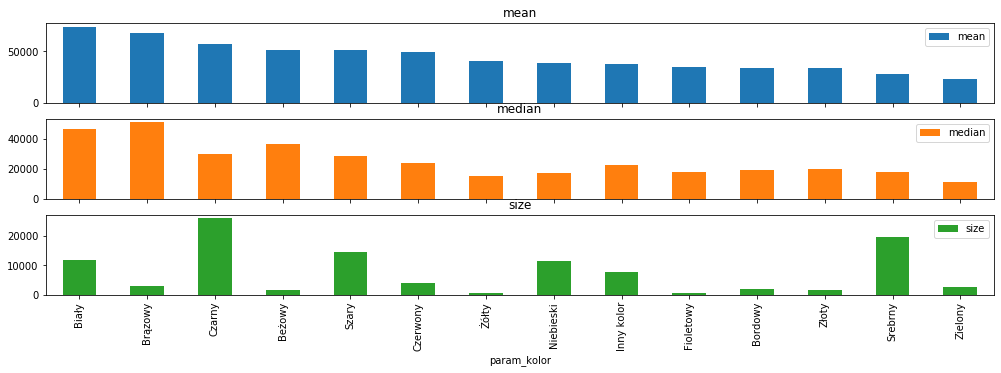

In [44]:
# Checking color

group_and_barplot('param_kolor',feat_sort='mean')

# Most expensive cars - white, least expensive - green.